In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


Knn

In [2]:
df = pd.read_csv('stocks.csv')
df = df.iloc[: , 1:]

In [3]:
year_1 = df[df['Year'] == 2021].reset_index(drop=True)

In [4]:
year_2 = df[df['Year'] == 2022].reset_index(drop=True)

In [5]:
scaler = StandardScaler()

In [6]:
X_train = year_1.iloc[:,2:4]
y_train = year_1.iloc[:,4]
X_test = year_2.iloc[:,2:4]
y_test = year_2.iloc[:,4]

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
scores = {}
scores_list = []
range_k = [3,5,7,9,11]
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)


Confusion Matrix:
[[26  6]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.77      1.00      0.87        20

    accuracy                           0.88        52
   macro avg       0.88      0.91      0.88        52
weighted avg       0.91      0.88      0.89        52



Text(0, 0.5, 'Accuracy')

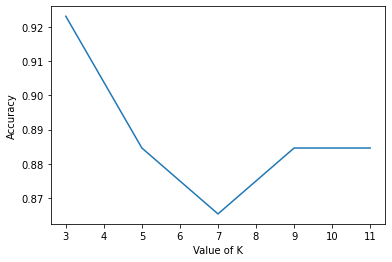

In [9]:
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Year 2

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8846153846153846


In [11]:
#knn for 3 neighbors
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)


Confusion Matrix:
[[28  4]
 [ 0 20]]


In [12]:
TPR = 20/(20+0)
TPR

1.0

In [13]:
TNR = 28/(28+3)
TNR

0.9032258064516129

Compare custom strategy to buy & hold for KNN

In [14]:
year_2["label"] = y_pred

In [15]:
#buy and hold for inital investment of 10000 INR
no_shares = 10000/year_2.iloc[0]['open']
buy = year_2.iloc[0]['open']
sell = year_2.iloc[-1]['open']

returns1 = (sell*no_shares - buy*no_shares) 

profit_loss = 100 * (returns1/10000)

print("Investment amount: 10000 INR")
print("Buy price: {:,.2f} INR".format(buy))
print("Sell price: {:,.2f} INR".format(sell))
print("Return percentage: {:.2f}%".format(profit_loss))
print("Profit/Loss: {:,.2f} INR".format(returns1))

Investment amount: 10000 INR
Buy price: 2,428.69 INR
Sell price: 2,547.20 INR
Return percentage: 4.88%
Profit/Loss: 487.96 INR


In [16]:
cash = 10000
stock = 0

for i in range(0,52): 
    label = year_2.iloc[i,4]
    if label == 1 and stock ==0:
      stock = cash/year_2.iloc[i,5]
      cash = 0
      x = i
      break
for i in range(x,51):
    label = year_2.iloc[i,4]
    label2 = year_2.iloc[i+1,4]

    if (label == 0 and label2 ==0) and (stock !=0):
      cash = stock*year_2.iloc[i,5]
      stock = 0
    if (label == 1 and label2 ==1) and (stock ==0):
      stock = cash/year_2.iloc[i,5]
      cash = 0
        
#cashing out in case we end with stocks
if cash == 0:
    cash = stock*year_2.iloc[i,5]

returns1 = cash-10000

profit_loss = 100 * (returns1/10000)

print("Investment amount: 10000 INR")
print("Return percentage: {:.2f}%".format(profit_loss))
print("Profit/Loss: {:,.2f} INR".format(returns1))

Investment amount: 10000 INR
Return percentage: 10.63%
Profit/Loss: 1,062.86 INR


Therefore our custom strategy gives us a better result by 5.75%


Logistic regression

In [17]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [18]:
print(logreg.coef_, logreg.intercept_)


[[ 2.1839414  -1.38652531]] [-0.4537133]


Equation = 1 / (1+e^(-x)), where x = -0.45 + 2.18*(mean_return) - 1.39*(volatility)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8076923076923077


In [20]:
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[24  8]
 [ 2 18]]


In [21]:
TPR = 18/(18+2)
TPR

0.9

In [22]:
TNR = 24/(24+8)
TNR

0.75

Compare custom strategy to buy & hold for logistic regression

In [23]:
year_2["label"] = y_pred

In [24]:
#buy and hold for inital investment of 10000 INR
no_shares = 10000/year_2.iloc[0]['open']
buy = year_2.iloc[0]['open']
sell = year_2.iloc[-1]['open']

returns1 = (sell*no_shares - buy*no_shares) 

profit_loss = 100 * (returns1/10000)

print("Investment amount: 10000 INR")
print("Buy price: {:,.2f} INR".format(buy))
print("Sell price: {:,.2f} INR".format(sell))
print("Return percentage: {:.2f}%".format(profit_loss))
print("Profit/Loss: {:,.2f} INR".format(returns1))

Investment amount: 10000 INR
Buy price: 2,428.69 INR
Sell price: 2,547.20 INR
Return percentage: 4.88%
Profit/Loss: 487.96 INR


In [25]:
cash = 10000
stock = 0

for i in range(0,52): 
    label = year_2.iloc[i,4]
    if label == 1 and stock ==0:
      stock = cash/year_2.iloc[i,5]
      cash = 0
      x = i
      break
for i in range(x,51):
    label = year_2.iloc[i,4]
    label2 = year_2.iloc[i+1,4]

    if (label == 0 and label2 ==0) and (stock !=0):
      cash = stock*year_2.iloc[i,5]
      stock = 0
    if (label == 1 and label2 ==1) and (stock ==0):
      stock = cash/year_2.iloc[i,5]
      cash = 0
        
#cashing out in case we end with stocks
if cash == 0:
    cash = stock*year_2.iloc[i,5]

returns1 = cash-10000

profit_loss = 100 * (returns1/10000)

print("Investment amount: 10000 INR")
print("Return percentage: {:.2f}%".format(profit_loss))
print("Profit/Loss: {:,.2f} INR".format(returns1))

Investment amount: 10000 INR
Return percentage: 17.79%
Profit/Loss: 1,779.04 INR


Therefore our custom strategy gives us a better result by 12.91%
